In [97]:
from scipy.stats import multivariate_normal
from pandas import read_csv, DataFrame, option_context
import numpy as np
from matplotlib import pyplot

## Config Vars

In [98]:
conf_error_vects_path = 'data/error_vects.csv'
shifts = 3
threshold = 112000000000000000000000000000000

## Load Dataset

In [99]:
error_vects_full = read_csv(conf_error_vects_path , header=0, index_col=0)

## Seperate data

In [100]:
train = error_vects_full.shape[0] * 1 // 2
    
error_vects = error_vects_full.iloc[:-train]

error_vects_test = error_vects_full.iloc[-train:]

In [101]:
error_vects.head()

,1,2,3,label
57577,0.688413,0.425917,0.541328,0
57578,0.215176,0.705548,0.187722,0
57579,0.444555,0.373660,0.446161,0
57580,1.697910,0.291087,0.295427,0
57581,0.330465,1.459326,0.313205,0


## Calculate Means and covariance matrix of error vects

In [102]:
means = error_vects[error_vects.columns[:-1]].mean()
covariance = error_vects[error_vects.columns[:-1]].cov()

In [103]:
# np.array(error_vects_test[error_vects_test.columns[:-1]].iloc[row])

## Creating the Model

In [104]:
g_model = multivariate_normal(mean=means, cov=covariance)

In [105]:
error_val = DataFrame(columns = ['error'])
for row in range(error_vects_test.shape[0]):
    val = g_model.pdf(np.array(error_vects_test[error_vects_test.columns[:-1]].iloc[row]))
#     print(val*10**35)
    error_val.loc[row] = val*10**35
error_val.index = error_vects_test.index
error_val[["label"]] = error_vects_test[["label"]]

In [106]:
with option_context('display.float_format', '{:0.20f}'.format):
    with option_context('display.max_rows', None, 'display.max_columns', None):
        print(error_val)


                                                   error  label
64771 31405960936100626312094579425280.00000000000000...      0
64772 76250364493968020903618039250944.00000000000000...      0
64773 314693947804644826297705498148864.0000000000000...      0
64774 733900417631428182215466200072192.0000000000000...      0
64775 814171105104465360664333901627392.0000000000000...      0
64776 606352802990378426349734141624320.0000000000000...      0
64777 797675674260579624854878083350528.0000000000000...      0
64778 242890601496796117486073651658752.0000000000000...      0
64779 414663546345854607251084427657216.0000000000000...      0
64780 844256743518345062705842498830336.0000000000000...      0
64781 839293383780745959196740168974336.0000000000000...      0
64782 854901542299292173041213649190912.0000000000000...      0
64783 31607877099588702911178135830528.00000000000000...      0
64784 6913568653150700051429523980288.000000000000000...      0
64785 48104355645460670472796655058944.0

In [107]:
error_val_anomaly = error_val[error_val.label == 1]
error_val_non_anomaly = error_val[error_val.label == 0]

In [108]:
# xmarks=[i for i in range(42000,50000+1,50)]

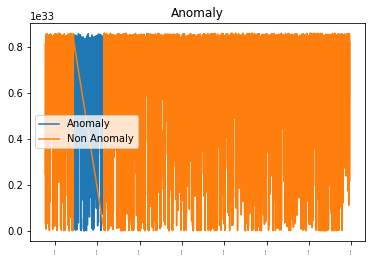

In [109]:
pyplot.figure()
pyplot.plot(error_val_anomaly['error'], label='Anomaly')
pyplot.plot(error_val_non_anomaly['error'], label='Non Anomaly')
# pyplot.xticks(xmarks)
pyplot.xticks(rotation=90, fontsize=2)
pyplot.legend()
pyplot.title("Anomaly")
pyplot.savefig('graph.png', dpi=1000)
pyplot.show()

In [110]:
def thresh():
    def func(x):
        if(x.error < threshold):
            return 1
        return 0
    return func

error_val['pred'] = error_val.apply(thresh(), axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
accuracy_score(error_val['label'], error_val['pred'], normalize=True, sample_weight=None)

0.8234394550257195

In [111]:
# from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
accuracy_score(error_val['label'], error_val['pred'], normalize=True, sample_weight=None)

0.8234394550257195

In [112]:
with option_context('display.float_format', '{:0.20f}'.format):
    with option_context('display.max_rows', None, 'display.max_columns', None):
        print(error_val)

                                                   error  label  pred
64771 31405960936100626312094579425280.00000000000000...      0     1
64772 76250364493968020903618039250944.00000000000000...      0     1
64773 314693947804644826297705498148864.0000000000000...      0     0
64774 733900417631428182215466200072192.0000000000000...      0     0
64775 814171105104465360664333901627392.0000000000000...      0     0
64776 606352802990378426349734141624320.0000000000000...      0     0
64777 797675674260579624854878083350528.0000000000000...      0     0
64778 242890601496796117486073651658752.0000000000000...      0     0
64779 414663546345854607251084427657216.0000000000000...      0     0
64780 844256743518345062705842498830336.0000000000000...      0     0
64781 839293383780745959196740168974336.0000000000000...      0     0
64782 854901542299292173041213649190912.0000000000000...      0     0
64783 31607877099588702911178135830528.00000000000000...      0     1
64784 69135686531507

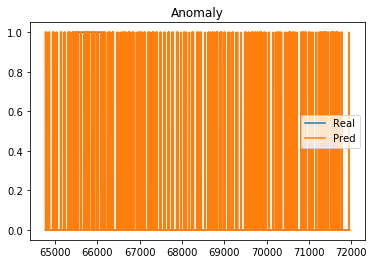

In [113]:
pyplot.figure()
pyplot.plot(error_val['label'], label='Real')
pyplot.plot(error_val['pred'], label='Pred')
pyplot.legend()
pyplot.title("Anomaly")
pyplot.show()

In [114]:
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
precision, recall, fscore, support = score(error_val['label'], error_val['pred'])

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.90090923 0.109375  ]
recall: [0.9031361  0.10694444]
fscore: [0.90202129 0.10814607]
support: [6473  720]


In [115]:
accuracy_score(error_val['label'], error_val['pred'], normalize=True, sample_weight=None)

0.8234394550257195

In [116]:
accuracy_score(error_val['label'], error_val['pred'], normalize=True, sample_weight=None)

0.8234394550257195